In [1]:
# the nodes must have indexes and have to be ordered by those. 
# the indexes start from 0 and must be contiguous

    # [id, adiacent nodes, mark, pre, post]
G = [ [0, [1,2], None, None, None], [1, [2, 5], None, None , None], 
      [2, [], None, None, None], [3, [2], None, None, None], 
      [4, [3,5], None, None, None], [5, [0, 4], None, None, None] ]

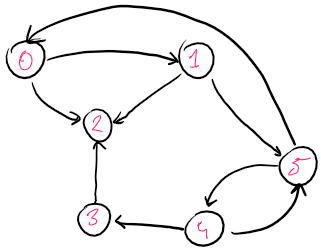

In [2]:
import copy

In [3]:
def reverse( G ) :
    
    G_rev = copy.deepcopy(G)
    
    for nodo in G_rev :
        nodo[1].clear()
    
    #arco (u,v) 
    
    i = 0
    for u in G :
        j = 0
        for v in u[1] :
            G_rev[v][1].append(i)
            j += 1
        i += 1
        
    return G_rev

In [4]:
G_rev = reverse(G)
G_rev

[[0, [5], None, None, None],
 [1, [0], None, None, None],
 [2, [0, 1, 3], None, None, None],
 [3, [4], None, None, None],
 [4, [5], None, None, None],
 [5, [1, 4], None, None, None]]

In [5]:
def visitDFSRecursive( G, s, T) :
    G[s][2] = 'm'
    for ad_node in G[s][1] :
        if ( G[ad_node][2] == None):
            T.append((G[ad_node][0], s))
            visitDFSRecursive(G, ad_node, T)

In [6]:
def visitDFSRInt( G, s ) :
    T = [(G[s][0], None)]
    visitDFSRecursive( G, s, T)
    return T    # depth tree father's vector

In [7]:
global clock 
clock = 1

def visitDFSRClock( G, s, T) :
    global clock
    G[s][2] = 'm'
    G[s][3] = clock   # pre
    clock =  clock + 1

    for ad_node in G[s][1] :
        if ( G[ad_node][2] == None):
            T.append((G[ad_node][0], s))
            visitDFSRClock(G, ad_node, T)
            
    G[s][4] = clock   # post
    clock = clock + 1

In [8]:
def interfaceDFSRC ( G, s) :
    T = [(G[s][0], None)]
    visitDFSRClock(G, s, T)
    return T

In [9]:
def DFSRCnotConnected ( G, s) :
    F = []    # forest of trees in father's vector form
    
    clock = 1
    for node in G :
        if ( node[2] == None):
            T = interfaceDFSRC(G, node[0])
            F.append(T)
            
    return F

# strongly connected components

In [10]:
def key_post (node) :
    return node[4]

def connectedComp ( G ) :
    for node in G :
        nodoe[2] = None
    
    Comp = []
    
    G_2 = copy.deepcopy(G)
    G_2.sort(reverse = True, key = key_post)
    
    for node in G_2 :
        print(node[0])
        if ( G[node[0]][2] == None) :
            T = visitDFSRInt(G, node[0])
            Comp.append(T)
    
    return Comp

In [11]:
def visit_DFS ( G ) :
    G_rev = reverse(G)
    DFSRCnotConnected(G_rev, 0)
    G = reverse(G_rev)
    
    return connectedComp( G )

In [12]:
visit_DFS( G )

2
3
0
5
4
1


[[(2, None)], [(3, None)], [(0, None), (1, 0), (5, 1), (4, 5)]]

In [13]:
G

[[0, [1, 2], None, None, None],
 [1, [2, 5], None, None, None],
 [2, [], None, None, None],
 [3, [2], None, None, None],
 [4, [3, 5], None, None, None],
 [5, [0, 4], None, None, None]]